In [1]:
import pandas as pd
import numpy as np

import requests
from urllib.parse import urlencode

from tqdm.auto import tqdm
from scipy.stats import norm 

import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
checks=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-perepechin/Проект_2_checks.csv',';')

In [3]:
checks

,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0
...,...,...
536,5645737,1900.0
537,5651566,1900.0
538,5662322,1900.0
539,5681918,1900.0


In [4]:
active_studs=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-perepechin/Проект_2_active_studs.csv',';')

In [5]:
active_studs

,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369
...,...
8336,1794344
8337,296883
8338,3598448
8339,3610547


In [6]:
groups_add=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-perepechin/group_add.csv',',')

In [7]:
groups_add

,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B
...,...,...
87,200247820,B
88,201032527,B
89,201067612,B
90,201067653,B


In [8]:
groups=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-perepechin/Проект_2_groups.csv',';')

In [9]:
groups

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A
...,...,...
74479,5692459,B
74480,5692572,B
74481,5692865,B
74482,5693667,B


In [10]:
#Проверим, учтены ли данные из groups_add в active_studs и checks:
print('Количество учтенных ID в active_studs:', groups_add.query('id in @active_studs.student_id').shape[0], 
      '\nКоличество учтенных ID в checks:',     groups_add.query('id in @checks.student_id').shape[0])

Количество учтенных ID в active_studs: 13 
Количество учтенных ID в checks: 1


In [11]:
#Соединим датафрейм groups c датафреймом groups_add, т.к. второй является дополнением первого:
groups_total = pd.concat([groups, groups_add])
print('Количество строк было:', groups_add.id.count() + groups.id.count(), 
      '\nКоличество строк после соединения:', pd.concat([groups, groups_add]).id.count(),
      '\nВсе верно' if groups_add.id.count() + groups.id.count() == groups_total.id.count()
                    else '\nНеверное количество')

Количество строк было: 74576 
Количество строк после соединения: 74576 
Все верно


In [12]:
print('Распределение всех пользователей по группам: \nГруппа A:', 
      groups_total.grp.value_counts()[1], '\nГруппа B:',
      groups_total.grp.value_counts()[0], '\nВсего:   ',
      groups_total.grp.value_counts()[1] +
      groups_total.grp.value_counts()[0])

Распределение всех пользователей по группам: 
Группа A: 14693 
Группа B: 59883 
Всего:    74576


In [13]:
paid_not_active = checks.query('student_id not in @active_studs.student_id')
print('Количество пользователей из списка активных, но не вошедших в общий список:', 
      active_studs.query('student_id not in @groups_total.id').shape[0],
      '\nКоличество оплативших пользователей, отсутствующих в общем списке:',
      checks.query('student_id not in @groups_total.id').shape[0],
      '\nКоличество оплативших пользователей, отсутствующих в списке активных в дни проведения теста:',
      paid_not_active.shape[0])

Количество пользователей из списка активных, но не вошедших в общий список: 0 
Количество оплативших пользователей, отсутствующих в общем списке: 0 
Количество оплативших пользователей, отсутствующих в списке активных в дни проведения теста: 149


In [14]:
#Получается, что в период проведения экспериментов были оплаты и от тех студентов, которые не посещали платформу. Возможно, это автоматические оплаты.
print('Распредление checks по группам: \nГруппа A:', 
      groups_total.query('id in @checks.student_id').grp.value_counts()[0], '\nГруппа B:',
      groups_total.query('id in @checks.student_id').grp.value_counts()[1], '\nВсего:   ', 
      groups_total.query('id in @checks.student_id').grp.value_counts()[0] + 
      groups_total.query('id in @checks.student_id').grp.value_counts()[1])


Распредление checks по группам: 
Группа A: 434 
Группа B: 107 
Всего:    541


In [15]:
print('Оплатили, но не в списке активных, количество по группам:\nГруппа A:', 
      groups_total.query('id in @paid_not_active.student_id').grp.value_counts()[1], '\nГруппа B:',
      groups_total.query('id in @paid_not_active.student_id').grp.value_counts()[0], '\nВсего:   ',
      groups_total.query('id in @paid_not_active.student_id').grp.value_counts()[1] + 
      groups_total.query('id in @paid_not_active.student_id').grp.value_counts()[0])

Оплатили, но не в списке активных, количество по группам:
Группа A: 29 
Группа B: 120 
Всего:    149


In [16]:
print('Распределение active_studs по группам: \nГруппа A:', 
      groups_total.query('id in @active_studs.student_id').grp.value_counts()[1], '\nГруппа B:',
      groups_total.query('id in @active_studs.student_id').grp.value_counts()[0], '\nВсего:   ',
      groups_total.query('id in @active_studs.student_id').grp.value_counts()[1] + 
      groups_total.query('id in @active_studs.student_id').grp.value_counts()[0])

Распределение active_studs по группам: 
Группа A: 1538 
Группа B: 6803 
Всего:    8341


In [17]:
print('Активные оплатившие пользователи, количество по группам: \nГруппа A:', 
      groups_total.query('id in @active_studs.student_id & id in @checks.student_id').grp.value_counts()[1], '\nГруппа B:',
      groups_total.query('id in @active_studs.student_id & id in @checks.student_id').grp.value_counts()[0], '\nВсего:   ',
      groups_total.query('id in @active_studs.student_id & id in @checks.student_id').grp.value_counts()[1] +
      groups_total.query('id in @active_studs.student_id & id in @checks.student_id').grp.value_counts()[0])

Активные оплатившие пользователи, количество по группам: 
Группа A: 78 
Группа B: 314 
Всего:    392


In [18]:
print('Активные, но не оплатившие пользователи, количество по группам: \nГруппа A:', 
      groups_total.query('id in @active_studs.student_id & id not in @checks.student_id').grp.value_counts()[1], '\nГруппа B:',
      groups_total.query('id in @active_studs.student_id & id not in @checks.student_id').grp.value_counts()[0], '\nВсего:   ',
      groups_total.query('id in @active_studs.student_id & id not in @checks.student_id').grp.value_counts()[1] +
      groups_total.query('id in @active_studs.student_id & id not in @checks.student_id').grp.value_counts()[0])

Активные, но не оплатившие пользователи, количество по группам: 
Группа A: 1460 
Группа B: 6489 
Всего:    7949


In [41]:
#Итак, у нас есть активные пользователи, те, что заходили на сайт в дни проведения теста и есть пользователи, которые совершили платежи. Активные с оплатившими пересекаются только частично, отсюда возникает вопрос: кто те пользователи, которые оплатили, но не попали в список активных? Из постановки задачи это не ясно, возможно это автоматические платежи, а возможно сбой системы и все оплатившие являются активными. Так как у нас нет возможности прояснить это, уберём из выборки оплативших не активных. Т.е. оплативших будем брать только тех, одновременно является и оплатившим, и активным (пересечение active_studs и checks - 392 человека).



In [42]:
#Объединим список активных пользователей со списком оплативших, отбросив из последних тех, кого нет в списке активных:
active_checks = (
                active_studs
                .merge(checks, how='left', on='student_id')
                .rename(columns={'student_id': 'id'})
                )
active_checks.query('rev.notna()').head()

,id,rev
62,1184303,1530.0000
67,3354191,1900.0001
77,3278734,1900.0000
99,720651,1980.0000
193,1232221,1900.0000


In [55]:
#Объединим активных оплативших из предыдущего шага с groups_total, оставив только активных:

active_total = groups_total.merge(active_checks, how='right', on='id')

In [44]:
#Добавим колонку со статусом оплаты (0 - не оплачен, 1 - оплачен):

active_total['payment'] = active_total.rev.apply(lambda x: 0 if np.isnan(x) else 1)
active_total.query('rev.isna()').head()

,id,grp,rev,payment
0,581585,A,NaN,0
1,5723133,A,NaN,0
2,3276743,B,NaN,0
3,4238589,A,NaN,0
4,4475369,B,NaN,0


In [45]:
#Заменим NaN на нули:

active_total['rev'] = active_total.rev.fillna(0)

In [46]:
#Сформируем датафрейм со всей собранной информацией. Активные + оплатившие:

active_total_paid = active_total.query('rev > 0')
active_total_paid.head()

,id,grp,rev,payment
62,1184303,A,1530.0000,1
67,3354191,B,1900.0001,1
77,3278734,B,1900.0000,1
99,720651,A,1980.0000,1
193,1232221,B,1900.0000,1


In [47]:
#Группа А:

a_group = active_total.query('grp == "A"')
a_group.head()

,id,grp,rev,payment
0,581585,A,0.0,0
1,5723133,A,0.0,0
3,4238589,A,0.0,0
7,1394612,A,0.0,0
21,5194768,A,0.0,0


In [48]:
#Активные оплатившие пользователи, группа А:

a_group_paid = a_group.query('rev > 0')
a_group_paid.head()

,id,grp,rev,payment
62,1184303,A,1530.0,1
99,720651,A,1980.0,1
306,4337103,A,580.0,1
392,332387,A,2910.0,1
439,1659434,A,690.0,1


In [49]:
#Активные пользователи, группа B:

b_group = active_total.query('grp == "B"')
b_group.head()

,id,grp,rev,payment
2,3276743,B,0.0,0
4,4475369,B,0.0,0
5,5481015,B,0.0,0
6,1353433,B,0.0,0
8,1170611,B,0.0,0


In [50]:
#Активные оплатившие пользователи, группа B:

b_group_paid = b_group.query('rev > 0')
b_group_paid.head()

,id,grp,rev,payment
67,3354191,B,1900.0001,1
77,3278734,B,1900.0000,1
193,1232221,B,1900.0000,1
195,3821501,B,1900.0000,1
211,1036096,B,1900.0000,1


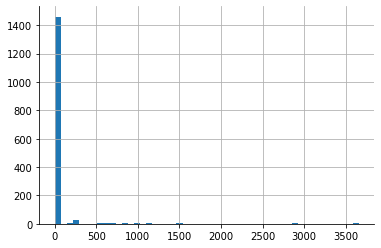

In [51]:
#Распределение группы А (все пользователи):

a_group.rev.hist(bins=50)
sns.despine()

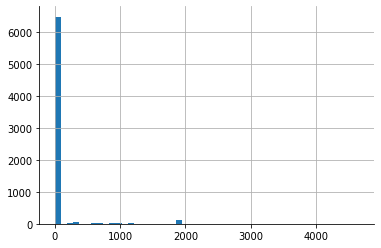

In [52]:
#Распределение группы В (все пользователи):

b_group.rev.hist(bins=50)
sns.despine()

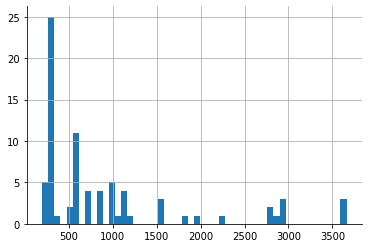

In [53]:
#Распределение группы А (только купившие):

a_group_paid.rev.hist(bins=50)
sns.despine()

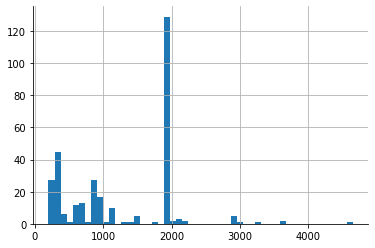

In [54]:
#Распределение группы В (только купившие):

b_group_paid.rev.hist(bins=50)
sns.despine()

In [33]:
#Сравним описательную статистику по всем пользователям в двух группах:

a_group_descr = a_group.rev.describe().to_frame().rename(columns={'rev': 'Группа В'})
b_group_descr = b_group.rev.describe().to_frame().rename(columns={'rev': 'Группа А'})
pd.concat([a_group_descr, b_group_descr], axis=1)

,Группа В,Группа А
count,1538.000000,6803.000000
mean,47.347204,58.058798
std,290.490632,313.770201
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,3660.000000,4650.000000


In [34]:
#Сравним описательную статистику по оплатившим пользователям в двух группах:

a_group_descr = a_group_paid.rev.describe().to_frame().rename(columns={'rev': 'Группа А'})
b_group_descr = b_group_paid.rev.describe().to_frame().rename(columns={'rev': 'Группа В'})
pd.concat([a_group_descr, b_group_descr], axis=1)

,Группа А,Группа В
count,78.000000,314.000000
mean,933.589744,1257.878992
std,919.932711,790.864254
min,199.000000,199.000000
25%,290.000000,511.750000
50%,585.000000,1140.000000
75%,1114.750000,1900.000000
max,3660.000000,4650.000000


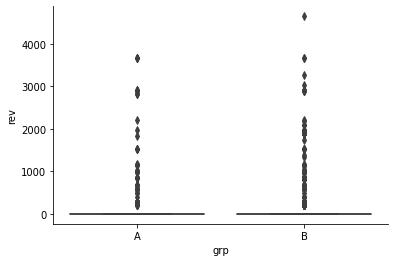

In [35]:
#Посмотрим на выборосы (все пользователи):

sns.boxplot(data=active_total, y='rev', x='grp')
sns.despine()

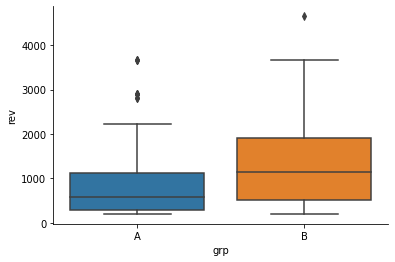

In [36]:
#Посмотрим на выборосы (купившие):

sns.boxplot(data=active_total_paid, y='rev', x='grp')
sns.despine()

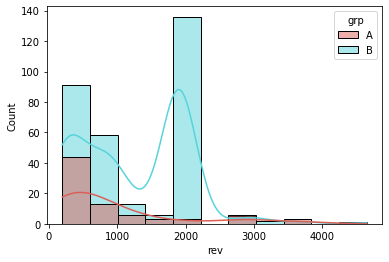

In [58]:
sns.histplot(x='rev', hue='grp', data=active_total.query('rev > 0'), kde=True, palette='hls')

In [ ]:
#Пользователи распределены по группам неравномерно. Группа B значительно больше, чем группа А.


In [37]:
#Считаю, что следует выбрать следующие метрики:

#CR (конверсия онлайн платежей) - отношение количества оплативших клиентов к общему числу активных клиентов. Может отражать юзабилити новой механики оплаты. Например часть пользователей не оплачивают т.к. сталкиваются с трудностями при оплате. Следовательно, CR выше в том варианте, где пользователю проще проивзести оплату.
#ARPU - отношение общей суммы на количество активных пользователей. Важный показатель для бизнеса, при увеличении этого показателя бизнес получает больше денег.
#ARPPU - отношение общей суммы на количество активных оплативших пользователей. Причины выбора этой метрики такие же, как и в случае с ARPU.

In [38]:
print('\033[1mCR \033[0m\nКонверсия оплативших пользователей:\nГруппа А:', 
                                             round(a_group_paid.id.count() / a_group.id.count(), 4),
                                             '\nГруппа В:', 
                                             round(b_group_paid.id.count() / b_group.id.count(), 4),
      '\nКонверсия у группы B на', abs(round((round(b_group_paid.id.count() / b_group.id.count(), 4) - 
                                   round(a_group_paid.id.count() / a_group.id.count(), 4)) / 
                                   round(a_group_paid.id.count() / a_group.id.count(), 4), 3) * 100), '%',
      'больше, чем у группы А' if round((round(b_group_paid.id.count() / b_group.id.count(), 4) - 
                                  round(a_group_paid.id.count() / a_group.id.count(), 4)) / 
                                  round(a_group_paid.id.count() / a_group.id.count(), 4), 3) * 100 > 0 
                               else 'меньше, чем у группы А')

print('\n\033[1mARPPU \033[0m\nОтношение общей суммы на количество активных оплативших пользователей:\nГруппа А:',
                                                                                      round(a_group_paid.rev.mean(), 2), 
                                                                                     '\nГруппа В:', 
                                                                                      round(b_group_paid.rev.mean(), 2),
      '\nARPPU группы В на', round(round(b_group_paid.rev.mean() - a_group_paid.rev.mean(), 2) /
                             round(a_group_paid.rev.mean(), 2) * 100, 2),'%',
      'больше, чем у группы А' if round(round(b_group_paid.rev.mean() - a_group_paid.rev.mean(), 2) /
                                  round(a_group_paid.rev.mean(), 2) * 100, 2) > 0 
                               else 'меньше, чем у группы А/n')

print('\n\033[1mARPU\033[0m\nОтношение общей суммы на количество активных пользователей:\nГруппа А:',
                                                                          round(a_group_paid.rev.sum() / a_group.id.count(), 2),
                                                                          '\nГруппа В:', 
                                                                          round(b_group_paid.rev.sum() / b_group.id.count(), 2),
      '\nARPU группы В на', 
      round((round(b_group_paid.rev.sum() / b_group.id.count(), 2) - round(a_group_paid.rev.sum() / a_group.id.count(), 2)) /
      round(a_group_paid.rev.sum() / a_group.id.count(), 2) * 100, 2), '%',
      'больше, чем у группы А' if 
      round((round(b_group_paid.rev.sum() / b_group.id.count(), 2) - round(a_group_paid.rev.sum() / a_group.id.count(), 2)) /
      round(a_group_paid.rev.sum() / a_group.id.count(), 2) * 100, 2) > 0
                               else 'меньше, чем у группы А')

CR 
Конверсия оплативших пользователей:
Группа А: 0.0507 
Группа В: 0.0462 
Конверсия у группы B на 8.9 % меньше, чем у группы А

ARPPU 
Отношение общей суммы на количество активных оплативших пользователей:
Группа А: 933.59 
Группа В: 1257.88 
ARPPU группы В на 34.74 % больше, чем у группы А

ARPU
Отношение общей суммы на количество активных пользователей:
Группа А: 47.35 
Группа В: 58.06 
ARPU группы В на 22.62 % больше, чем у группы А


In [39]:
#Имеются ли различия в показателях и с чем они могут быть связаны?
#Наблюдаем отрицательный эффект CR, и положительные эффекты в ARPU и ARPPU. Другими словами: конверсия падает, но доход на пользователя/покупателя растёт. Это может быть связано c отсечением части пользователей платящих малые суммы с одновременным увеличением среднего чека.

#Являются ли эти различия статистически значимыми?
#Размеры групп очень сильно отличаются, поэтому классические тесты могут давать большие погрешности. В таких случаях идеально подходит bootstrap.

#Строим bootstrap распределения для групп А и B.
#Вычислим их разницу.
#В получившемся рапределении разницы находим доверительных интервал.
#Проверяем, попадает ли доверительный интервал в 0. Если да, то нулевая гипотеза на данном уровне значимости принимается, если нет - отвергается.

In [40]:
# функция для проверки гипотез с помощью бутстрапа
def get_bootstrap(
    data_column_1,                       # числовые значения первой (контрольной) выборки
    data_column_2,                       # числовые значения второй (тестовой) выборки
    boot_it   = 1000,                    # количество бутстрэп-подвыборок
    statistic = np.mean,                 # интересующая нас статистика
    bootstrap_conf_level = 0.95,         # уровень значимости
    graph         = True,                # отрисовывать ли график
    show_progress = True                 # показывать ли индикатор програсса
    ):
    boot_len  = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    
    # выбираем отрисовывать индикатора програсса или нет
    if show_progress:
        progress_bar = tqdm
    else:
        progress_bar = lambda x: x
    
    for i in progress_bar(range(boot_it)):        # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True                        # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        samples_delta = samples_2 - samples_1      # находим разницу подвыборок
        boot_data.append(statistic(samples_delta)) # применяем статистику для разниц подвыборок
        
    pd_boot_data = pd.DataFrame(boot_data)

    # доверительный интервал 
    left_quant  = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x     = 0, 
        loc   = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x     = 0, 
        loc   = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # отисовка графиков
    if graph == True:
        plt.hist(pd_boot_data[0], bins = 50)
        plt.style.use('ggplot')
        plt.vlines(ci, ymin=0, ymax=50, linestyle='--')
        plt.xlabel('boot_data')
        plt.ylabel('frequency')
        plt.title("Histogram of boot_data")
        plt.show()
       
    return {"ci": ci, 
            "p_value": p_value}

In [41]:
#Определим функции для метрик:

def cr_func(x):
    '''
    CR
    Для корректной работы функции в качестве аргумента y 
    необходимо передать серию со значениями 1 и 0, или True и False,
    в соответствие с тем произошло ожидаемое событие или нет.
    '''
    return sum(x) / len(x)

def arpu_func(y):
    '''
    ARPU
    Для корректной работы функции в качестве аргумента y 
    необходимо передать серию, где все NaN-значения заменнены на нули
    '''
    return np.mean(y)

def arppu_func(y):
    '''
    ARPPU
    Для корректной работы функции в качестве аргумента y 
    необходимо передать серию, где отобраны только платежи, т.е. отфильтрованы нули
    или вместо нулей стоят NaN.
    '''
    return np.mean(y)

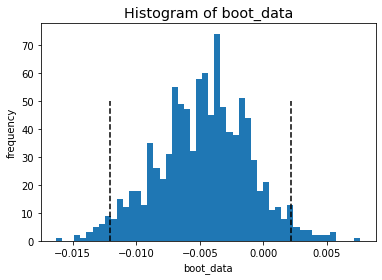

{'ci':               0
 0.025 -0.012054
 0.975  0.002205,
 'p_value': 0.19546771884171998}

In [42]:
#CR
#Сформулируем нулевую и альтернативную гипотезы:

#H0: CR в двух группах одинаковые.
#H1: CR в двух группах различаются.
get_bootstrap(a_group.payment, b_group.payment, statistic = cr_func)

In [50]:
#Доверительный интервал попадает в 0, недостаточно оснований отвергнуть нулевую гипотезу. Нельзя утверждать, что различия CR в двух группах есть.

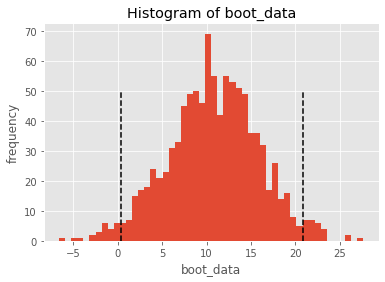

{'ci':                0
 0.025   0.358438
 0.975  20.889215,
 'p_value': 0.033531449336424844}

In [51]:
#ARPU
#Сформулируем нулевую и альтернативную гипотезы:

#H0: ARPU в двух группах одинаковые.
#H1: ARPU в двух группах различаются.
get_bootstrap(a_group.rev, b_group.rev, statistic = arpu_func)

In [52]:
#Доверительный интервал не попадает в 0, отвергаем нулевую гипотезу. ARPU в двух группах различаются.

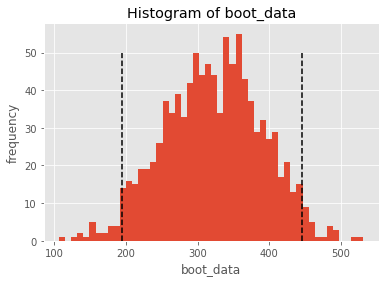

{'ci':                 0
 0.025  194.159327
 0.975  445.810126,
 'p_value': 2.100926966250897e-06}

In [53]:
#ARPPU
#Сформулируем нулевую и альтернативную гипотезы:

#H0: ARPPU в двух группах одинаковые.
#H1: ARPPU в двух группах различаются.
get_bootstrap(a_group.rev[a_group.rev > 0], b_group.rev[b_group.rev > 0], statistic = arppu_func)

In [54]:
#Доверительный интервал не попадает в 0, отвергаем нулевую гипотезу. ARPPU в двух группах различаются.

In [55]:
#Стоит ли запускать новую механику на всех пользователей?
#Да, новая механика оплаты даёт статистически значимый прирост в метриках ARPU и ARPPU, отрицательное изменение метрики CR не подтвердилось.


In [56]:
#Задание 3. Python
#Предположим, что у нас уже есть рабочий датафрейм:

# рабочий датафрэйм
total_test = (
    groups
    .merge(
        active_studs
            .assign(activity=1)
            .rename(columns={'student_id': 'id'})
        ,on='id', how='outer'
        )
    .merge(
        checks
            .assign(payment = 1)
            .rename(columns={'student_id': 'id'})
        ,on='id', how='outer'
    )
    .assign(step=0)
)
total_test.head()

,id,grp,activity,rev,payment,step
0,1489,B,NaN,NaN,NaN,0
1,1627,A,1.0,990.0,1.0,0
2,1768,B,NaN,NaN,NaN,0
3,1783,B,NaN,NaN,NaN,0
4,1794,A,NaN,NaN,NaN,0


In [57]:
add_csv_link = 'group_add.csv'

In [62]:
#Напишем несколько вспомогательных функций:

# выделяем активных, заполняем пропуски нулями
def get_active(df, to_dropna_ls=['activity', 'grp'], to_fillna_ls=['payment', 'rev']):
    '''
    df - датафрейм
    to_dropna_ls - указываем список колонок датафрэйма, по которым удаляем строки с NaN
    to_fillna_ls - указываем список колонок датафрэйма, по которым NaN заполняем нулями 
    '''
    df = (df
         .copy()
         .dropna(subset=to_dropna_ls)
         )
    for i in to_fillna_ls:
        df[i] = df[i].fillna(0)
    return df


# определяем разделитель в csv-файле
def get_sep(file_link):
    with open(file_link, 'r') as file:
        temp = file.readline()
    pattern = re.compile(r'\w*([,;])\w*')
    return pattern.findall(temp)[0]


# переименовываем колонки в соответствие с типом данных
def columns_renamer(df):
    if str(df.iloc[0, 0]).isalpha():
        df.columns = ['grp', 'id']
    else:
        df.columns = ['id', 'grp']

In [63]:
 def get_update(work_df, add_csv_link, final=False):
        '''
        Функция обновления данных и пересчёта метрик.
        На выходе поучаем датафрэйм со значениями метрик и p-value, 
        каждая строка - новый степ добавления данных (номер обновления показан в колонке step, 
        шаг 0 - значения без доп. файла/обновления)
        work_df       - объединённый дф из groups.csv, active_studs.csv, checks.csv (получены в первый раз).
        add_csv_link  - ссылка на дополнительный файл groups_add.csv, 
                        возможно использование web-ссылки на Яндекс.Диск, или ссылки на файл в файловой системе.
        final         - если True, выведет только последнюю (финальную) строку таблицы.
        '''

            # открываем файл
        group_add_df = pd.read_csv(add_csv_link, sep=get_sep(add_csv_link))

        # переименуем колонки в соответствие с типом данных
        columns_renamer(group_add_df)

        # объединяем основной дф с дополнительным
        work_df          = work_df.merge(group_add_df, on='id', how='outer')
        work_df['grp_x'] = work_df.grp_x.fillna('')                  # заполняем пропуски пустым символом
        work_df['grp_y'] = work_df.grp_y.fillna('')                  # заполняем пропуски пустым символом
        work_df['grp']   = work_df.grp_x + work_df.grp_y             # объединяем колонки групп
        work_df          = work_df.drop(['grp_x', 'grp_y'], axis=1)  # удаляем колонки grp_x и grp_y

        # присваиваем значения step в добавленных строках
        mask = work_df.id.isin(group_add_df.id)             # назначаем маску, согласно которой будем присваивать новый номер степа
        work_df.loc[mask, 'step'] = work_df.step.max() + 1  # присваиваем номер степа
        work_df['step'] = work_df.step.astype('int')        # переводим колонку степ в int

        # оставим только активных
        work_df = get_active(work_df)

        # пересчитаем метрики, каждый цикл - новое добавление файла groups_add
        df_ab = pd.DataFrame()  # пустой дф для заполнения через цикл

        for i in range(work_df.step.max() + 1):  # итеритуемся по максимальному значению колонки step +1
            # фильтруем датасет для рассчёта метрик
            payment_a      = work_df.query('step <= @i and grp =="A"').payment               
            payment_b      = work_df.query('step <= @i and grp =="B"').payment
            rev_all_a      = work_df.query('step <= @i and grp =="A"').rev
            rev_all_b      = work_df.query('step <= @i and grp =="B"').rev
            rev_positive_a = work_df.query('step <= @i and rev > 0 and grp =="A"').rev
            rev_positive_b = work_df.query('step <= @i and rev > 0 and grp =="B"').rev

            #CR_a
            cr_a = cr_func(payment_a)
            #CR_b
            cr_b = cr_func(payment_b)
            #CR p-value
            cr_p_value = get_bootstrap(payment_a, 
                                       payment_b,
                                       statistic=cr_func,
                                       graph = False,
                                       show_progress = False
                         )["p_value"]
            #ARPU_a
            arpu_a = arpu_func(rev_all_a)
            #ARPU_b
            arpu_b = arpu_func(rev_all_b)
            #ARPU p-value
            arpu_p_value = get_bootstrap(rev_all_a, 
                                         rev_all_b,
                                         statistic=arpu_func,
                                         graph = False,
                                         show_progress = False
                           )["p_value"]
            #ARPPU_a
            arppu_a       = arppu_func(rev_positive_a)
            #ARPPU_b
            arppu_b       = arppu_func(rev_positive_b)
            #ARPPU p-value
            arppu_p_value = get_bootstrap(rev_positive_a,
                                          rev_positive_b,
                                          statistic=arppu_func,
                                          graph = False,
                                          show_progress = False
                            )["p_value"]

            # временный датафрэйм
            temp_df = pd.DataFrame([[cr_a, 
                                     cr_b, 
                                     cr_p_value, 
                                     arpu_a, 
                                     arpu_b, 
                                     arpu_p_value, 
                                     arppu_a, 
                                     arppu_b, 
                                     arppu_p_value]],
                                   columns=['CR_A',
                                            'CR_B',
                                            'CR_p-value',
                                            'ARPU_A',
                                            'ARPU_B',
                                            'ARPU_p-value', 
                                            'ARPPU_A',
                                            'ARPPU_B',
                                            'ARPPU_p-value'])
            # добавляем строку в итоговый дф
            df_ab = pd.concat([df_ab, temp_df])      

        # сбрасываем индексы
        df_ab.reset_index(drop=True, inplace=True)  
        df_ab['step'] = df_ab.index

        if final == True:
            return df_ab.tail(1)

        return df_ab

In [64]:
#В функцию get_update передадим предварительно сформированный датафрейм total_test:

metrix = get_update(total_test, add_csv_link)
metrix

,CR_A,CR_B,CR_p-value,ARPU_A,ARPU_B,ARPU_p-value,ARPPU_A,ARPPU_B,ARPPU_p-value,step
0,0.050814,0.046077,0.228957,47.439739,57.864567,0.045406,933.589744,1255.827487,0.000003,0
1,0.050715,0.046156,0.230837,47.347204,58.058798,0.048395,933.589744,1257.878992,0.000002,1


In [65]:
def get_graphs(df):
    '''
    Функция построения графика на основе датасэта, сформированного функцией get_update
    Шесть графиков: 
    по оси X - номер обновления (колонка step в передаваемом дф), показывает 
    какой раз обновились данные (некий аналог временной шкалы, т.к. не известны даты создания 
    дополнительных файлов)
    по оси Y - метрики (верхний ряд графиков) и p-value этих метрик (нижний ряд графиков)
    '''
    # формируем датафрэйм для отрисовки метрик
    metrix_df = pd.DataFrame(columns = ['step', 'group'])                     # создаём пустой финальный дф для построения графиков метрик
    for i in ['CR_', 'ARPU_', 'ARPPU_']:                                      # список части названий колонок для отбора
        cols    = df.filter(like = i).columns                                 # отбираем колонки содержащие названия метрик
        temp_df = pd.DataFrame()                                              # создаём пустой дф
        for j in cols[:2]:                                                    # итерируемся по названиям колонок, кроме p-value
            tmp_row         = df[[j, 'step']] \
            .assign(group = j[-1:]) \
            .rename(columns = {j: j[:-2]})  # формируем строку нового дф
            temp_df         = pd.concat([temp_df, tmp_row])                   # добавляем строку в промежуточный дф
        metrix_df = metrix_df \
                    .merge(temp_df, on=['step', 'group'], how='right')        # объединяем промежуточный дф с финальным
    
    # формируем блок из 6 графиков
    figure, axes = plt.subplots(2, 3, sharex=True, figsize=(16,7))   
    
    # заголовок
    figure.suptitle('Метрики и p-value', fontsize=20)
    
    # графики CR и p-value для CR
    sns.lineplot(ax=axes[0, 0], data=metrix_df, x='step', y='CR', hue='group', linewidth=2)
    ax1 = sns.lineplot(ax=axes[1, 0], data=df, x='step', y='CR_p-value', linewidth=2, color="#5fa0c6", label='p-value')
    ax1.axhline(0.05, ls='--', linewidth=1.5, color=(1, 0, 0, 0.7), label='p-value = 0.05')
    ax1.set_ylabel('P-value для CR')
    ax1.set_xlabel('Номер обновления')
    ax1.legend()
    
    # графики ARPU и p-value для ARPU
    sns.lineplot(ax=axes[0, 1], data=metrix_df, x='step', y='ARPU', hue='group', linewidth=2)
    ax2 = sns.lineplot(ax=axes[1, 1], data=df, x='step', y='ARPU_p-value', linewidth=2, color="#5fa0c6", label='p-value')
    ax2.axhline(0.05, ls='--', linewidth=1.5, color=(1, 0, 0, 0.7), label='p-value = 0.05')
    ax2.set_ylabel('P-value для ARPU')
    ax2.set_xlabel('Номер обновления')
    ax2.legend()
    
    # графики ARPPU и p-value для ARPPU
    sns.lineplot(ax=axes[0, 2], data=metrix_df, x='step', y='ARPPU', hue='group', linewidth=2)
    ax3 = sns.lineplot(ax=axes[1, 2], data=df, x='step', y='ARPPU_p-value', linewidth=2, color="#5fa0c6", label='p-value')
    ax3.axhline(0.05, ls='--', linewidth=1.5, color=(1, 0, 0, 0.7), label='p-value = 0.05')
    ax3.set_ylabel('P-value для ARPPU ')
    ax3.set_xlabel('Номер обновления')
    ax3.set_xticks(range(0, metrix_df.step.max() + 1))  # сделаем шаг по оси х = 1
    ax3.legend()
    
    # устанавливаем лимиты на ось y
    plt.gcf().get_axes()[0].set_ylim(0, metrix_df.CR.max() * 1.1)                  
    plt.gcf().get_axes()[1].set_ylim(0, metrix_df.ARPU.max() * 1.1)
    plt.gcf().get_axes()[2].set_ylim(0, metrix_df.ARPPU.max() * 1.1)
    plt.gcf().get_axes()[3].set_ylim(-0.001, max(0.05, metrix['CR_p-value'].max()) * 1.1)
    plt.gcf().get_axes()[4].set_ylim(-0.001, max(0.05, metrix['ARPU_p-value'].max()) * 1.1)
    plt.gcf().get_axes()[5].set_ylim(-0.001, max(0.05, metrix['ARPPU_p-value'].max()) * 1.1)
    
    # добавляем расстояния между графиками
    plt.subplots_adjust(top=0.92, hspace = 0.1, wspace=0.3)

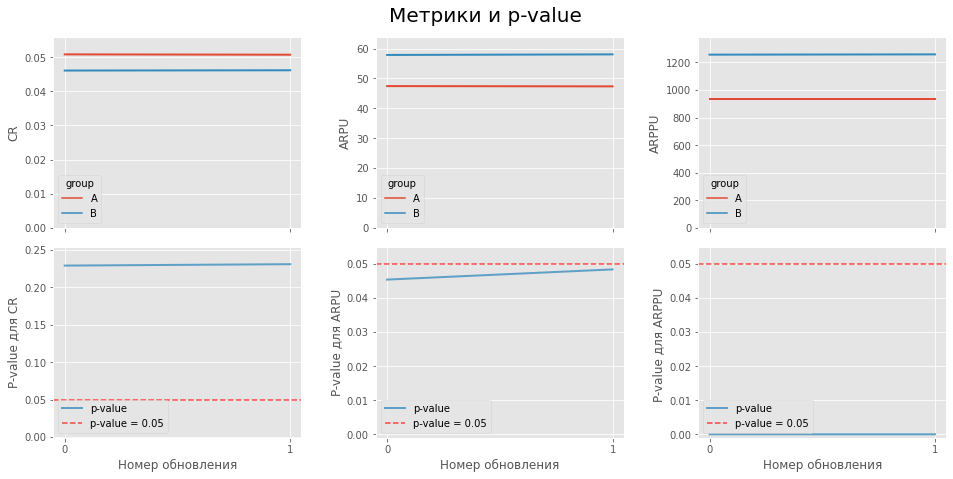

In [66]:
#В функцию get_graphs передадим метрики, записанные в переменную metrix:

get_graphs(metrix)

In [ ]:
#Задание 2. SQL
SELECT 
    studs.test_grp, 
    COALESCE(SUM(s.money), 0) / NULLIF(COUNT(at.st_id), 0) AS ARPU,
    COALESCE(SUM(s.money), 0) / NULLIF(SUM(at.active_in_total), 0) AS ARPAU,
    COALESCE(SUM(s.sale_subject), 0)::float / NULLIF(COUNT(at.st_id), 0) AS CR,
    SUM(CASE WHEN at.active_in_total = 1 AND s.sale_subject = 1 THEN 1 ELSE 0 END)::float / NULLIF(SUM(CASE WHEN at.active_in_total = 1 THEN 1 ELSE 0 END), 0) AS CR_active,
    SUM(CASE WHEN am.active_in_math = 1 AND s.sale_math = 1 THEN 1 ELSE 0 END)::float / NULLIF(SUM(am.active_in_math), 0) AS CR_math
FROM
(
    SELECT actives.st_id, 
        MAX(CASE WHEN actives.peas_per_day >= 30 THEN 1 ELSE 0 END) AS active_in_total
    FROM 
    (
        SELECT st_id, 
            toStartOfDay(timest) AS day,
            SUM(correct) AS peas_per_day
        FROM peas
        GROUP BY st_id, day
    ) AS actives
    GROUP BY actives.st_id
) AS at
INNER JOIN
(
    SELECT active_by_subj.st_id, 
        MAX(CASE WHEN active_by_subj.math_per_day >= 30 THEN 1 ELSE 0 END) AS active_in_math
    FROM 
    (
        SELECT st_id, 
            toStartOfDay(timest) AS day,
            SUM(correct) AS math_per_day
        FROM peas
        GROUP BY st_id, day
    ) AS active_by_subj
    GROUP BY active_by_subj.st_id
) AS am
ON at.st_id = am.st_id
INNER JOIN 
    studs     
ON at.st_id = studs.st_id
LEFT JOIN
(
    SELECT st_id, SUM(money) AS money,
        COUNT(*) AS sale_subject,
        MAX(CASE WHEN subject = 'Math' THEN 1 ELSE 0 END) AS sale_math
    FROM final_project_check 
    GROUP BY st_id
) AS s
ON at.st_id = s.st_id
GROUP BY studs.test_grp